In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
penguins = pd.read_csv("penguins.csv")

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [36]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [37]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Chinstarp has less count than the two so it can affect K mean clustering 

In [38]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [39]:
penguins_subset=penguins.dropna(axis=0).reset_index(drop=True)
penguins_subset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [40]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

 ### Converting the categorical column `'sex'` into numeric

In [41]:
penguins_subset=pd.get_dummies(penguins_subset,drop_first=True,columns=['sex'])

In [44]:
penguins_subset.drop(['island'],axis=1)

X=penguins_subset.drop(['species','island'],axis=1)
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [45]:
X_scaled = StandardScaler().fit_transform(X)

In [67]:
num_clusters=[i for i in range(2,11)]
def kmeans_inertia(num_clusters,x_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [68]:
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[885.6224143652249,
 578.8284278107235,
 386.14534424773285,
 284.5464837898288,
 217.92858573807678,
 201.39287843423264,
 186.82270634899209,
 173.47283154242746,
 164.55854201979943]

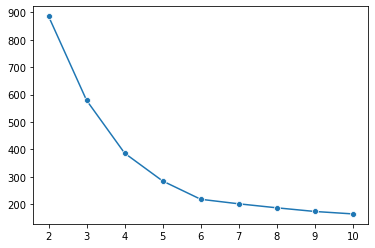

In [69]:
sns.lineplot(x=num_clusters, y=inertia, marker = 'o')

In [75]:
def kmeans_sil(num_clusters,x_val):
    sil_score=[]
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_val)
        sil_score.append(silhouette_score(x_val, kms.labels_))
    return sil_score
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.44398088353055243,
 0.45101024097188364,
 0.5080140996630784,
 0.519998574860868,
 0.5263224884981607,
 0.47774022332151733,
 0.42680523270292947,
 0.35977478703657334,
 0.3589883410610364]

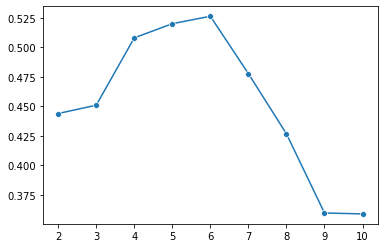

In [76]:
sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')

number of clusters=6

In [77]:
kmean=KMeans(n_clusters=6, random_state=42)
kmean.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [79]:
 np.unique(kmean.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [80]:
penguins_subset['cluster'] = kmean.labels_
penguins_subset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,2
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,2
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,0


Use `groupby` to verify if any `'cluster'` can be differentiated by `'species'`.

In [81]:
penguins_subset.groupby(by=['cluster', 'species']).size()

cluster  species  
0        Adelie       71
1        Gentoo       58
2        Adelie       73
         Chinstrap     5
3        Gentoo       61
4        Adelie        2
         Chinstrap    34
5        Chinstrap    29
dtype: int64

Next, interpret the groupby outputs. Although the results of the groupby show that each `'cluster'` can be differentiated by `'species'`, it is useful to visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'`. 

**Note:** The code for the graph below is outside the scope of this lab. 

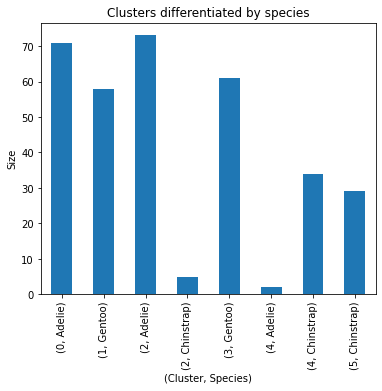

In [82]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

In [83]:
penguins_subset.groupby(by=['cluster','species', 'sex_MALE']).size().sort_values(ascending = False)

cluster  species    sex_MALE
2        Adelie     0           73
0        Adelie     1           71
3        Gentoo     1           61
1        Gentoo     0           58
4        Chinstrap  1           34
5        Chinstrap  0           29
2        Chinstrap  0            5
4        Adelie     1            2
dtype: int64

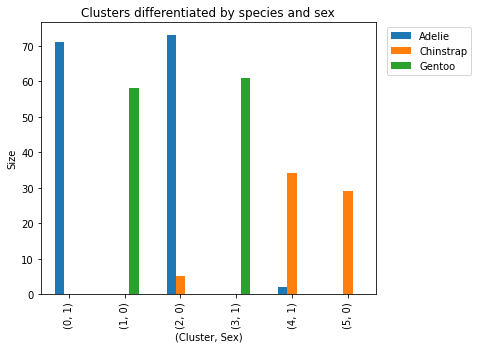

In [84]:
penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))